In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import phys
from scipy.optimize import curve_fit
mpld3.enable_notebook()

In [3]:
z = 0.0231959  # redshift determined by Na D line

In [4]:
def Gaussian(wv, wv0, min_velocity, width_velocity, intensity):
    wv0_obs = wv0 * (1 + z)
    velocity = (wv / wv0_obs - 1) * phys.c
    return intensity * np.exp(-0.5 * ((velocity - min_velocity) / width_velocity)**2)

In [5]:
def Model(wv, a, b,
          Si_min_vel, Si_width_vel, Si_intensity, 
          C_min_vel, C_width_vel, C_intensity):
    Si_wv0 = 6355
    C_wv0 = 6580
    Si_flux = Gaussian(wv, Si_wv0, Si_min_vel, Si_width_vel, Si_intensity)
    C_flux = Gaussian(wv, C_wv0, C_min_vel, C_width_vel, C_intensity)
    continuum = a * wv + b
    return continuum + Si_flux + C_flux

In [6]:
def FitCAndSiLines(filename, p0, lambda0=6050, lambda1=6600):
    spec = np.genfromtxt(filename, names=["wavelength", "flux"])
    idx = np.logical_and(spec["wavelength"] > 6050, 
                         spec["wavelength"] < 6600)
    spec = spec[idx]
    spec["flux"] /= np.median(spec["flux"])
    plt.plot(spec["wavelength"], spec["flux"], color="gray")

    popt, pcov = curve_fit(Model, spec["wavelength"], spec["flux"],
                           p0=p0)

    wv = np.linspace(spec["wavelength"].min(), spec["wavelength"].max(), 1001)
    plt.plot(wv, Model(wv, *popt), color='k')

    Si_min_vel = popt[2]
    Si_min_vel_err = np.sqrt(pcov[3][3])
    C_min_vel = popt[5]
    C_min_vel_err = np.sqrt(pcov[6][6])

    print("Si velocity: %4.1f +/- %4.1f kkm/s" % (Si_min_vel / 1e8, Si_min_vel_err / 1e8))
    print("C velocity: %4.1f +/- %4.1f kkm/s" % (C_min_vel / 1e8, C_min_vel_err / 1e8))

Si velocity: -14.6 +/-  0.2 kkm/s
C velocity: -14.5 +/-  0.1 kkm/s


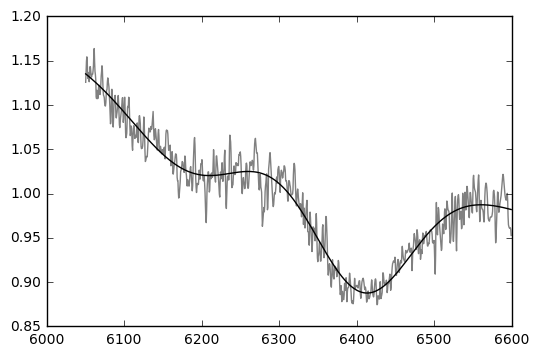

In [7]:
filename = "16abc_20160405_Gemini_N_v1.ascii"
p0 = [0, 0, -15e8, 5e8, -0.1, -15e8, 5e8, -0.2]
FitCAndSiLines(filename, p0)

Si velocity: -13.4 +/-  0.1 kkm/s
C velocity: -13.7 +/-  0.1 kkm/s


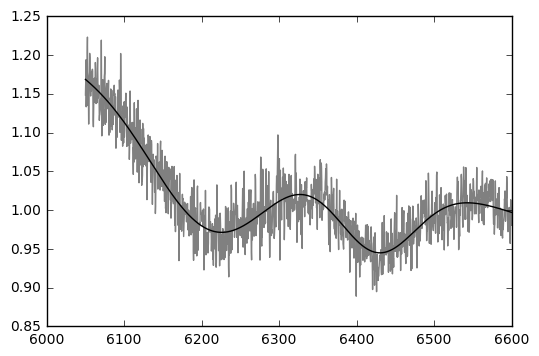

In [8]:
filename = "16abc_20160406_Keck2_v1.ascii"
p0 = [0, 0, -13e8, 5e8, -0.2, -13e8, 5e8, -0.1]
FitCAndSiLines(filename, p0)

Si velocity: -12.3 +/-  0.2 kkm/s
C velocity: -12.8 +/-  0.3 kkm/s


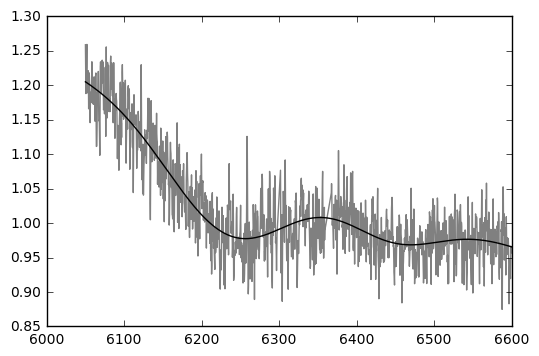

In [9]:
filename = "16abc_20160408_Keck2_v2.ascii"
p0 = [0, 0, -11e8, 5e8, -0.2, -9e8, 5e8, -0.1]
FitCAndSiLines(filename, p0, lambda0=6100, lambda1=6650)

Si velocity: -11.2 +/-  0.1 kkm/s
C velocity: -11.8 +/-  0.2 kkm/s


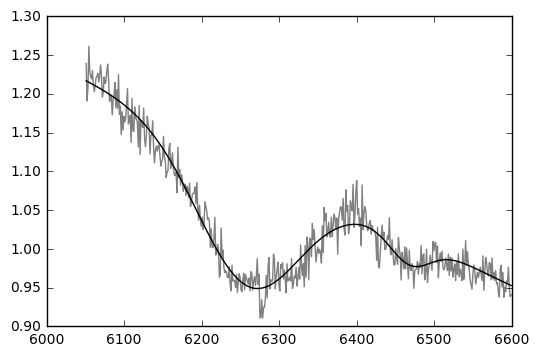

In [10]:
filename = "16abc_20160410_Keck1_v1.ascii"
p0 = [0, 0, -13e8, 5e8, -0.2, -7e8, 3e8, -0.1]
FitCAndSiLines(filename, p0)

Si velocity: -10.3 +/-  0.1 kkm/s
C velocity: -41.7 +/- 460.7 kkm/s


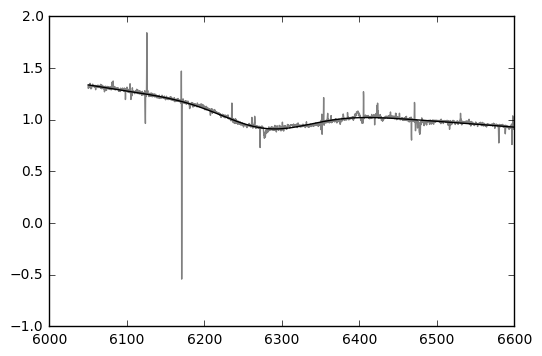

In [11]:
filename = "16abc_20160414_VLT_v1.ascii"
p0 = [0, 0, -10e8, 5e8, -0.2, -7e8, 3e8, -0.1]
FitCAndSiLines(filename, p0, lambda1=6700)

In [42]:
phase = np.array([-15.8, -15.1, -13.1, -11.3])
vel = np.array([14.6, 13.4, 12.3, 11.2])
vel_err = np.array([0.2, 0.1, 0.2, 0.1])

-17.95


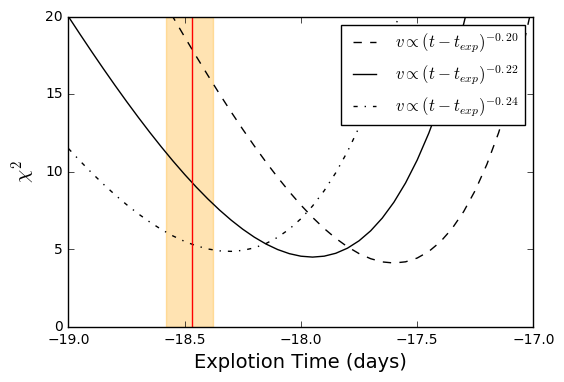

In [58]:
t_range = np.linspace(-19, -17, 41)
chi2 = np.ndarray(t_range.shape)
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.20)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
plt.plot(t_range, chi2, 'k--', label="$v\\propto (t-t_{exp})^{-0.20}$")
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.22)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
idx = np.argmin(chi2)
print(t_range[idx])
plt.plot(t_range, chi2, 'k-', label="$v\\propto (t-t_{exp})^{-0.22}$")
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.24)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
plt.plot(t_range, chi2, 'k-.', label="$v\\propto (t-t_{exp})^{-0.24}$")
plt.ylim(0, 20)

y_min, y_max = plt.ylim()
plt.plot([-18.47, -18.47], [y_min, y_max], 'r')
plt.fill_between([-18.58, -18.38], y1=y_min, y2=y_max, color='orange', alpha=0.3, zorder=1)

plt.xlabel("Explotion Time (days)", fontsize=14)
plt.ylabel("$\\chi^2$", fontsize=15)
plt.legend(loc='upper right')
plt.savefig("exp_date_chi2.pdf")

TypeError: 1 is not JSON serializable

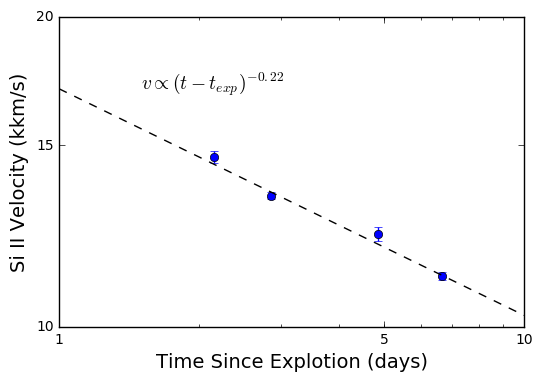

In [56]:
ax = plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

t0 = -17.95
ax.errorbar(phase - t0, vel, yerr=vel_err, marker='o', linestyle='none')

x = (phase - t0)**(-0.22)
c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
t = np.linspace(1, 10, 100)
ax.plot(t, c * t**(-0.22), 'k--')
ax.set_xlim(1, 10)
ax.set_ylim(10, 20)
ax.set_xticks([1, 5, 10])
ax.set_xticklabels(["1", "5", "10"])
ax.set_yticks([10, 15, 20])
ax.set_yticklabels(["10", "15", "20"])
ax.set_xlabel("Time Since Explotion (days)", fontsize=14)
ax.set_ylabel("Si II Velocity (kkm/s)", fontsize=14)
ax.text(1.5, 17, "$v\\propto (t-t_{exp})^{-0.22}$", fontsize=14)
plt.savefig("SiIIVelocity.pdf")

In [61]:
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.22)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
idx = np.argmin(chi2)
chi2 -= np.min(chi2)
prob = np.exp(-chi2 / 2)
thresh = 0.997 * np.sum(prob)
i = 3
while np.sum(prob[idx-i:idx+i+1]) < thresh:
    i += 1
print(t_range[idx-i], t_range[idx], t_range[idx+i])

-18.65 -17.95 -17.25
